



Epoch 1/10


450/450 [==============================] - 25s 49ms/step - loss: 0.3024 - accuracy: 0.9097 - val_loss: 0.0162 - val_accuracy: 0.9981
Epoch 2/10
450/450 [==============================] - 24s 53ms/step - loss: 0.0117 - accuracy: 0.9974 - val_loss: 0.0116 - val_accuracy: 0.9981
Epoch 3/10
450/450 [==============================] - 24s 53ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 0.0332 - val_accuracy: 0.9919
Epoch 4/10
450/450 [==============================] - 25s 55ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.0191 - val_accuracy: 0.9937
Epoch 5/10
450/450 [==============================] - 27s 59ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0077 - val_accuracy: 0.9981
Epoch 6/10
450/450 [==============================] - 24s 54ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0021 - val_accuracy: 0.9994
Epoch 7/10
450/450 [==============================] - 27s 61ms/step - loss: 6.1168e-05 - accuracy: 1.0000 - val_loss: 0.0023 - val

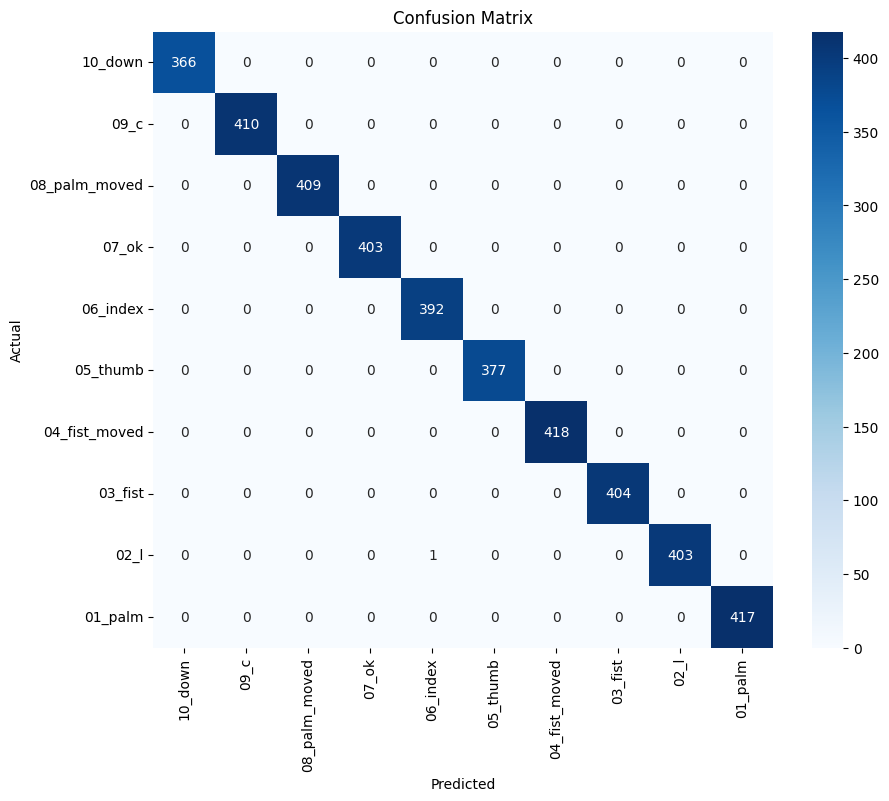

Classification Report:
               precision    recall  f1-score   support

      10_down       1.00      1.00      1.00       366
         09_c       1.00      1.00      1.00       410
08_palm_moved       1.00      1.00      1.00       409
        07_ok       1.00      1.00      1.00       403
     06_index       1.00      1.00      1.00       392
     05_thumb       1.00      1.00      1.00       377
04_fist_moved       1.00      1.00      1.00       418
      03_fist       1.00      1.00      1.00       404
         02_l       1.00      1.00      1.00       404
      01_palm       1.00      1.00      1.00       417

     accuracy                           1.00      4000
    macro avg       1.00      1.00      1.00      4000
 weighted avg       1.00      1.00      1.00      4000

Sample Predictions:
True Label: 04_fist_moved Predicted Label: 04_fist_moved
True Label: 01_palm Predicted Label: 01_palm
True Label: 04_fist_moved Predicted Label: 04_fist_moved
True Label: 06_index Pred

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define constants
GESTURE_CLASSES = ['10_down', '09_c', '08_palm_moved','07_ok','06_index','05_thumb','04_fist_moved','03_fist','02_l','01_palm']  # Add all gesture classes
IMG_HEIGHT, IMG_WIDTH = 64, 64  # Adjust as needed

# Function to load images and labels
def load_data(root_dir):
    images = []
    labels = []
    for subject_folder in os.listdir(root_dir):
        subject_dir = os.path.join(root_dir, subject_folder)
        if os.path.isdir(subject_dir):
            for gesture_class in os.listdir(subject_dir):
                gesture_dir = os.path.join(subject_dir, gesture_class)
                if os.path.isdir(gesture_dir) and gesture_class in GESTURE_CLASSES:
                    for filename in os.listdir(gesture_dir):
                        img = cv2.imread(os.path.join(gesture_dir, filename), cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
                        images.append(img)
                        labels.append(GESTURE_CLASSES.index(gesture_class))
    return np.array(images), np.array(labels)

# Load data
root_dir = "C:\\Users\\Lingesh\\Downloads\\archive (1)\\leapGestRecog"
images, labels = load_data(root_dir)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(GESTURE_CLASSES), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train.reshape(-1, IMG_HEIGHT, IMG_WIDTH, 1), y_train, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test.reshape(-1, IMG_HEIGHT, IMG_WIDTH, 1), y_test)
print("Test accuracy:", test_acc)

# Generate predictions
predictions = model.predict(X_test.reshape(-1, IMG_HEIGHT, IMG_WIDTH, 1))
predicted_labels = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=GESTURE_CLASSES, yticklabels=GESTURE_CLASSES)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, predicted_labels, target_names=GESTURE_CLASSES))

# Sample predictions
print("Sample Predictions:")
for i in range(10):
    print("True Label:", GESTURE_CLASSES[y_test[i]], "Predicted Label:", GESTURE_CLASSES[predicted_labels[i]])
